<a href="https://colab.research.google.com/github/EzyHow/ML-Deep-Learning-GenAI/blob/main/11_Image_Generation_with_Diffusion_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [1]:
!pip install transformers
!pip install diffusers accelerate torch torchvision

import requests
from io import BytesIO
from transformers import pipeline
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt

# 2. Text to Image

### 2.1 Load Text-to-Image model

In [2]:
import torch
from diffusers import StableDiffusionPipeline

# Load SD 1.5 - more memory friendly for Colab
model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"

# Fixed: Use 'dtype' instead of 'torch_dtype'
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    dtype=torch.float16  # Changed from torch_dtype
)

# Verify CUDA is available before moving to GPU
if torch.cuda.is_available():
    pipe = pipe.to("cuda")
    print("Using GPU acceleration")
else:
    print("Using CPU - will be slower")

# Memory optimizations for Colab
pipe.enable_attention_slicing()
if hasattr(pipe, 'enable_vae_slicing'):
    pipe.enable_vae_slicing()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Using GPU acceleration


### 2.2 Generate Image from Text

  0%|          | 0/50 [00:00<?, ?it/s]

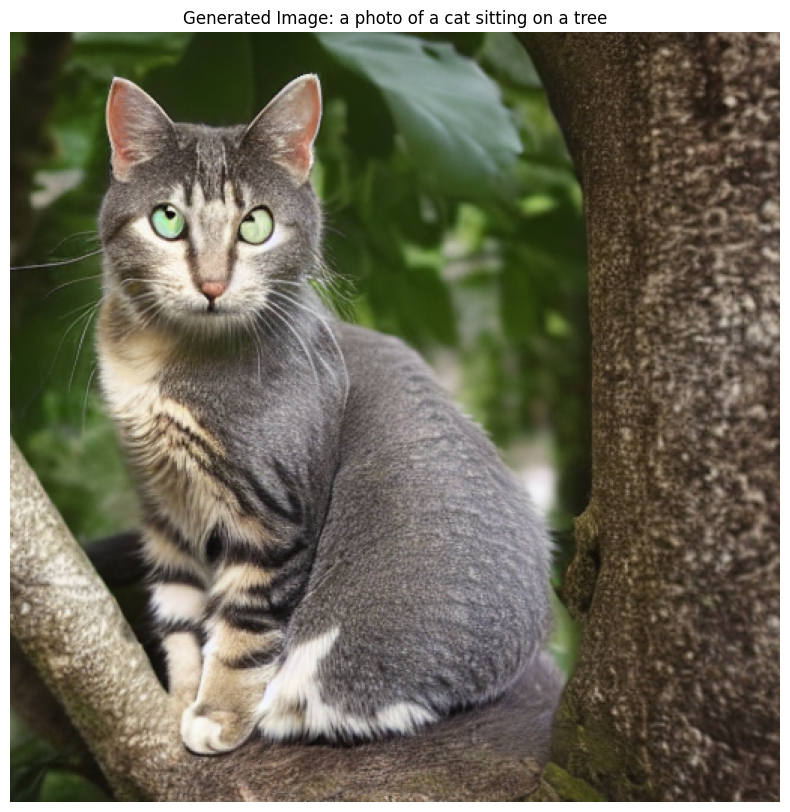

In [4]:

prompt = "a photo of a cat sitting on a tree"
image = pipe(prompt, num_inference_steps=50).images[0]
image.save("cat_image.png")

# Display using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Remove axis ticks and labels
plt.title("Generated Image: " + prompt)
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

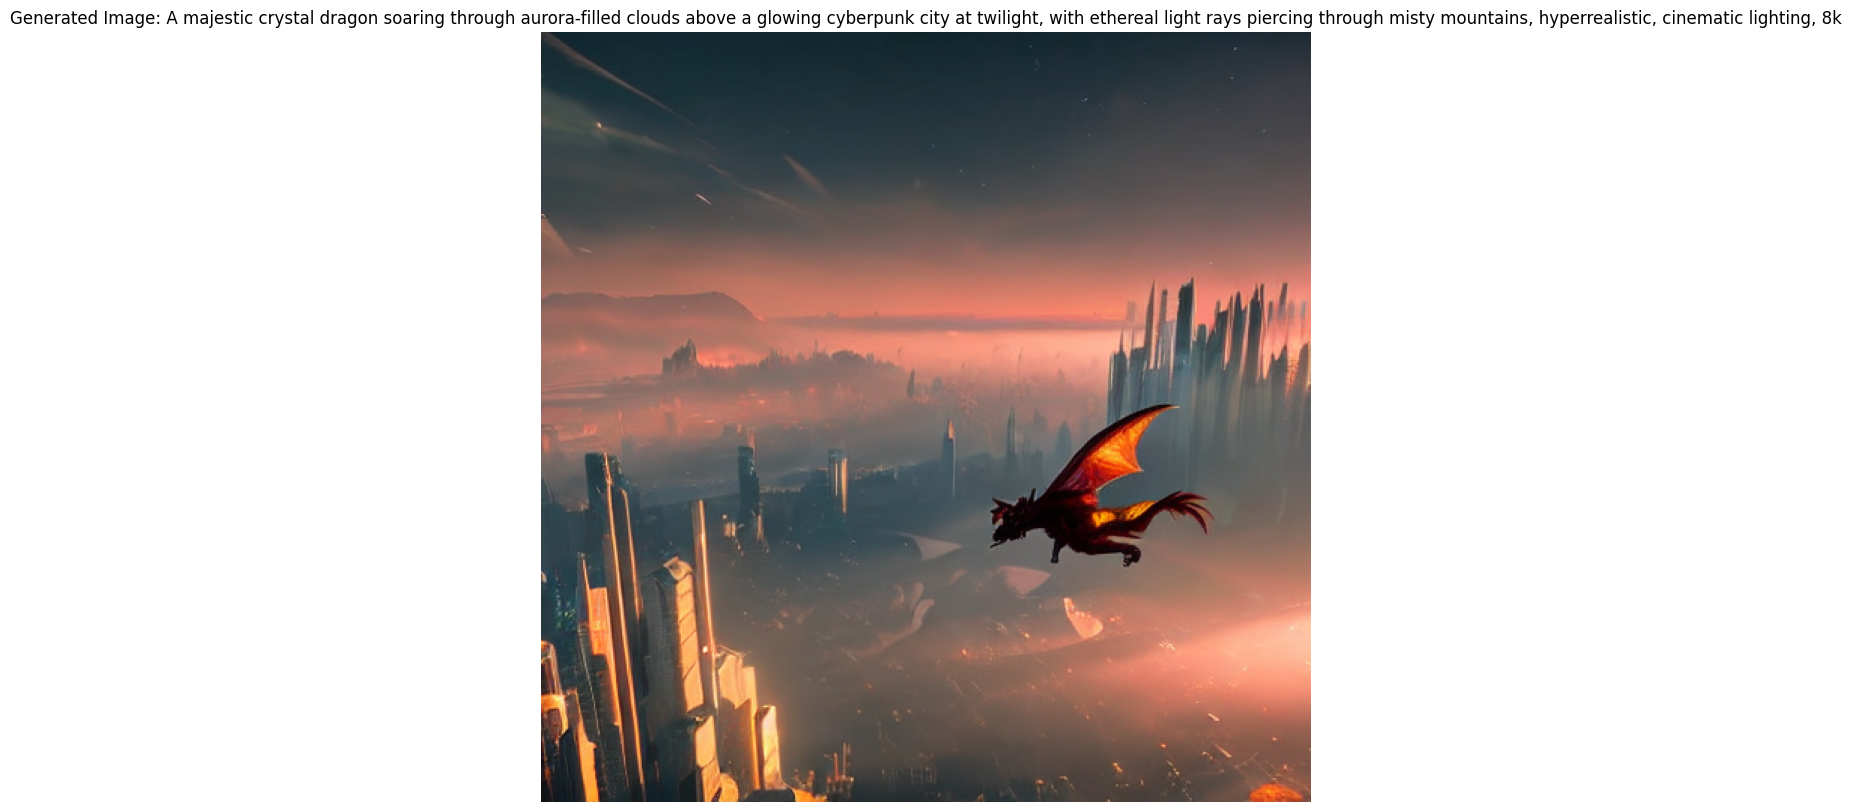

In [10]:

prompt2 = "A majestic crystal dragon soaring through aurora-filled clouds above a glowing cyberpunk city at twilight, with ethereal light rays piercing through misty mountains, hyperrealistic, cinematic lighting, 8k"
image2 = pipe(prompt2, num_inference_steps=50).images[0]
image2.save("crystal_dragon_image.png")

# Display using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image2)
plt.axis('off')  # Remove axis ticks and labels
plt.title("Generated Image: " + prompt2)
plt.show()

# 3. Image to Text

### 3.1 Load Image to Text Model

In [12]:
image_captioner = pipeline('image-to-text', model="Salesforce/blip-image-captioning-base")
print("Image-to-text pipeline loaded.")


/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2242: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Device set to use cuda:0


Image-to-text pipeline loaded.


### 3.2 Image to Text

Generated Caption: [{'generated_text': 'a cat sitting on a tree branch with green eyes'}]


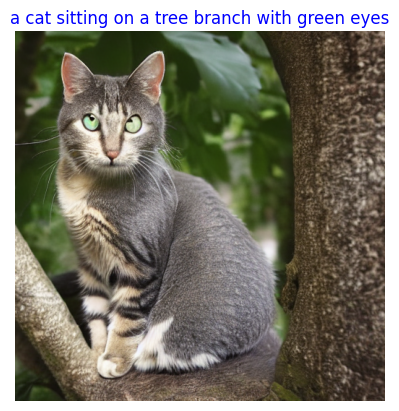

In [11]:

caption_results = image_captioner(image)
print("Generated Caption:", caption_results)

plt.imshow(image)
plt.axis("off")
plt.title(caption_results[0]["generated_text"], fontsize=12, color="blue")
plt.show()

Generated Caption: [{'generated_text': 'a dragon flying over a city in the sky'}]


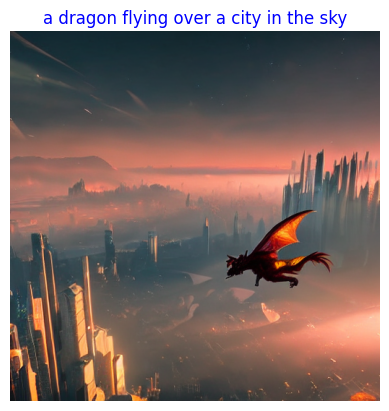

In [13]:

caption_results = image_captioner(image2)
print("Generated Caption:", caption_results)

plt.imshow(image2)
plt.axis("off")
plt.title(caption_results[0]["generated_text"], fontsize=12, color="blue")
plt.show()

## Text-to-Image Generation Summary

### Model Selection

I used the **Stable Diffusion 1.5** model (`stable-diffusion-v1-5`) for the text-to-image generation.

*   **Reasoning:** Stable Diffusion 1.5 is a widely used and well-documented model that is known to be more memory-friendly, making it suitable for environments like Google Colab.

### Prompts and Parameters

I used the following prompts and parameters for image generation:

*   **Prompt 1:** "a photo of a cat sitting on a tree"
    *   `num_inference_steps`: 50
*   **Prompt 2:** "A majestic crystal dragon soaring through aurora-filled clouds above a glowing cyberpunk city at twilight, with ethereal light rays piercing through misty mountains, hyperrealistic, cinematic lighting, 8k"
    *   `num_inference_steps`: 50

For both generations, I used `50` inference steps.

### Observations

*   **Quality and Characteristics:** The generated images generally reflect the content of the prompts. The first image of the cat on the tree is a straightforward representation. The second image, with the more complex prompt, shows an attempt to capture the various elements like the dragon, aurora, cyberpunk city, and lighting, although the level of detail and realism can vary depending on the complexity of the prompt and the model's capabilities.
*   **Challenges/Findings:** The text-to-image generation process was relatively smooth with the Stable Diffusion 1.5 model after resolving the initial model loading issue. The main challenge encountered earlier was related to loading the Stable Cascade model, which required troubleshooting the correct loading method and understanding the model's structure.

Overall, Stable Diffusion 1.5 successfully generated images based on the provided text prompts within the Colab environment.